## MaxCut demo

1. Load the Maxcut class and define the graph.

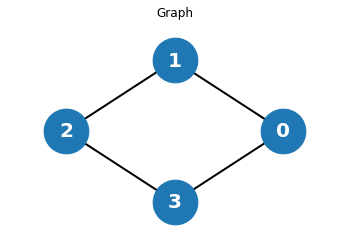

In [3]:
from QuICT.algorithm.quantum_machine_learning.VQA.QAOA import MaxCut

n = 4
edges = [(0, 1), (1, 2), (2, 3), (0, 3)]
maxcut = MaxCut(n, edges)
maxcut.draw_graph()

2. start training

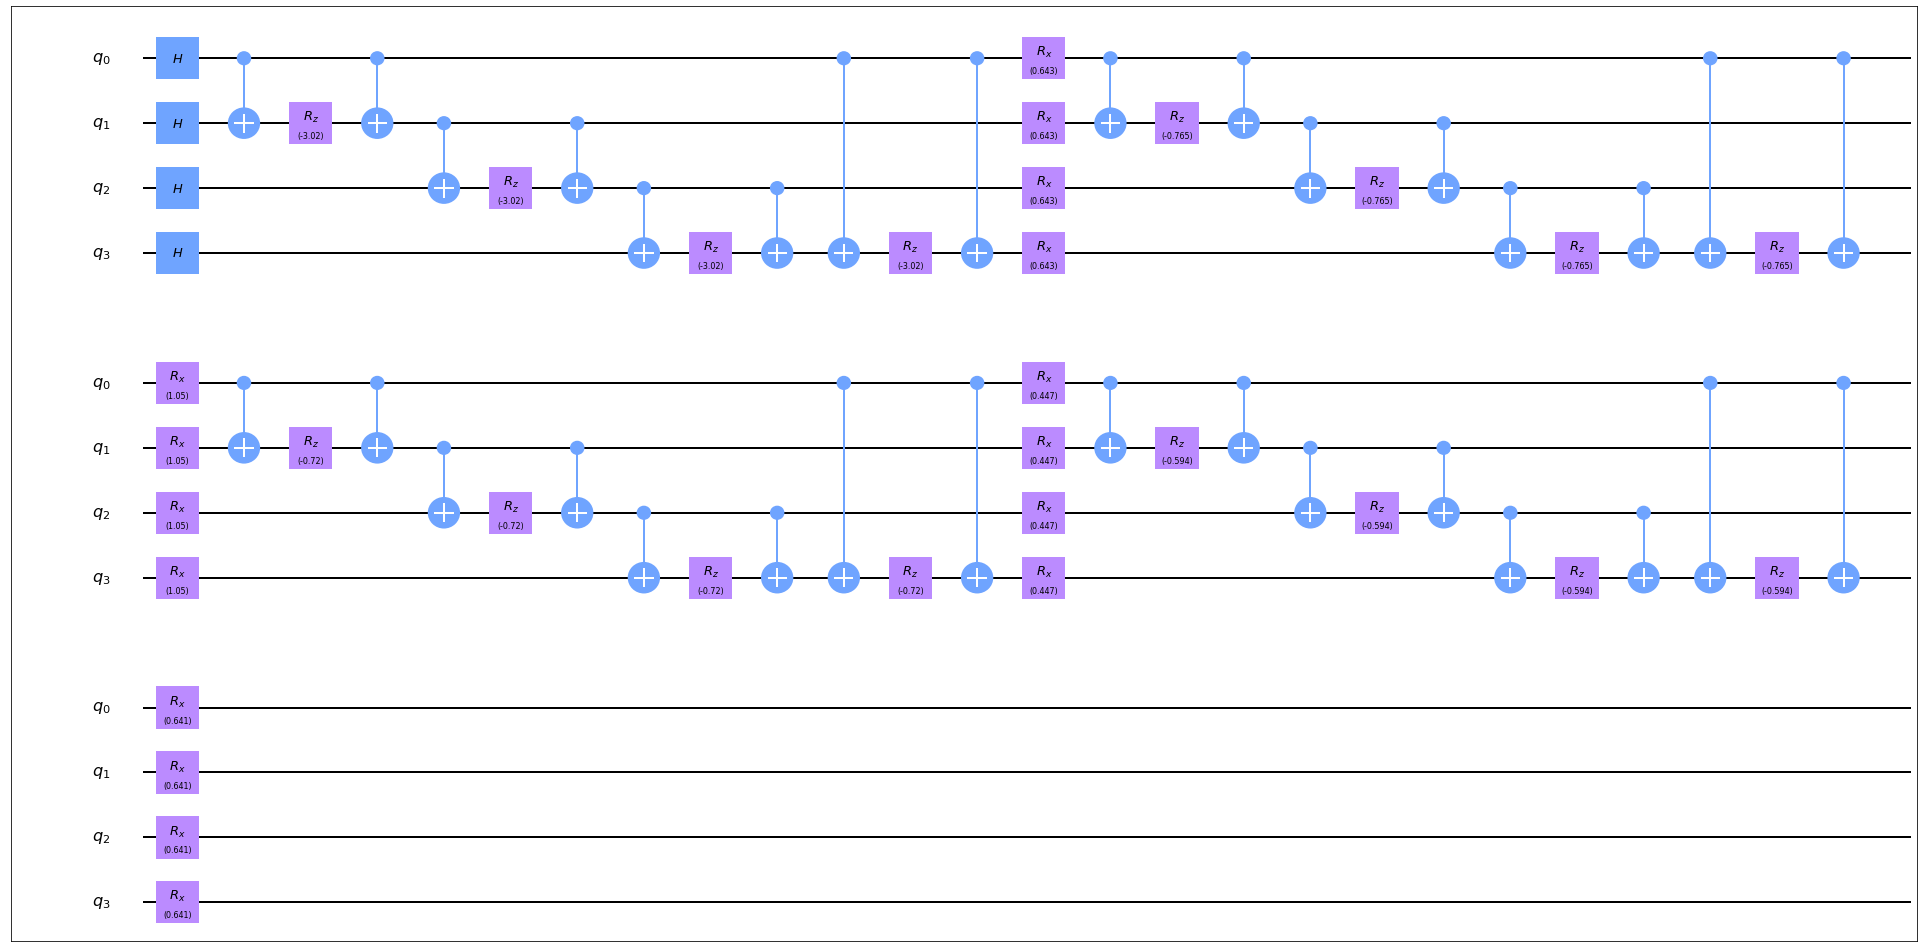

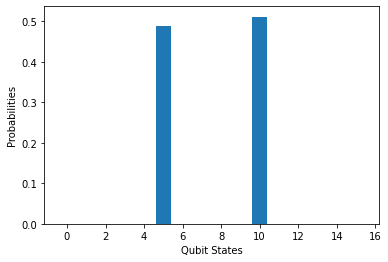

In [4]:
# Training
max_cut_num, cut_edges = maxcut.solve_maxcut(
    p=4,
    max_iters=100,
    lr=0.1,
    plot_prob=True,
    draw_circuit=True,
    save_model=True
)

3. Print the results.

Max cut: 4
Cut edges: [(0, 1), (0, 3), (1, 2), (2, 3)]


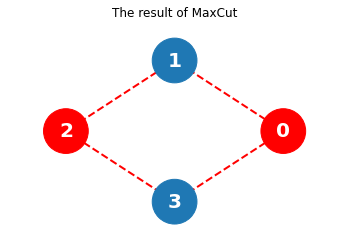

In [5]:
print("Max cut: {}".format(max_cut_num))
print("Cut edges: {}".format(cut_edges))
maxcut.draw_result()

## Solve for the largest eigenvalue of any Hamiltonian

1. Get Hamiltonian from randomly generated Pauli string.

In [ ]:

import numpy as np
import torch
from QuICT.algorithm.quantum_machine_learning.VQA.QAOA.qaoa import QAOA
from QuICT.algorithm.quantum_machine_learning.utils.hamiltonian import Hamiltonian


def random_pauli_str(n_items, n_qubits):
    pauli_str = []
    coeffs = np.random.rand(n_items)
    for i in range(n_items):
        pauli = [coeffs[i]]
        for qid in range(n_qubits):
            flag = np.random.randint(0, 5)
            if flag == 0:
                pauli.append("X" + str(qid))
            elif flag == 1:
                pauli.append("Y" + str(qid))
            elif flag == 2:
                pauli.append("Z" + str(qid))
            elif flag == 3:
                pauli.append("I" + str(qid))
            elif flag == 4:
                continue
        pauli_str.append(pauli)
    return pauli_str

n_items = 3
n_qubits = 5
pauli_list = random_pauli_str(n_items, n_qubits)
# [[0.15603237671232995, 'I0', 'Y1', 'Y2', 'I3', 'I4'], [0.21790241683735379, 'X0', 'Y1', 'Z2', 'Z3', 'Z4'], [0.7876285520126287, 'X2', 'Y3', 'I4']]
print(pauli_list)
hamiltonian = Hamiltonian(pauli_list)
print(hamiltonian._pauli_str)

2. Start QAOANet and train

In [ ]:
qaoa = QAOA(n_qubits, p=12, hamiltonian=hamiltonian)
hamiltonian_matrix = hamiltonian.get_hamiton_matrix(n_qubits)
eigens = np.linalg.eig(hamiltonian_matrix)
max_eigen = np.real(eigens[0][np.argmax(eigens[0])])
print("Max Eigen: ", max_eigen)

state = qaoa.train(optimizer="Adam", lr=0.1, max_iters=150, save_model=True)
# model_path = "/home/zoker/quict/QAOA_model_2022-10-13-15_48_03"
expect = -qaoa.net.loss_func(state)
print("Expect: ", expect)
# 1.6295



#### QuICT

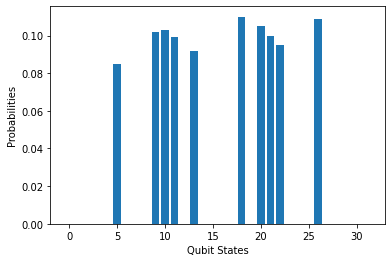

Max cut: 4
Cut edges: [(0, 1), (0, 4), (2, 3), (3, 4)]


In [1]:
from QuICT.algorithm.quantum_machine_learning.VQA.QAOA import MaxCut

n = 5
# edges = [(0, 1), (1, 2), (2, 3), (0, 3)]

def generate_circle(n):
    edges = []
    for i in range(n-1):
        edges.append((i, i + 1))
    edges.append((n - 1, 0))
    return edges

edges = generate_circle(n)
maxcut = MaxCut(n, edges)

# Training
max_cut_num, cut_edges = maxcut.solve_maxcut(
    p=4,
    max_iters=100,
    lr=0.1,
    plot_prob=True,
    save_model=False
)

print("Max cut: {}".format(max_cut_num))
print("Cut edges: {}".format(cut_edges))

In [6]:
from quafu import QuantumCircuit, User
from quafu import Task


test_ghz = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg c[4];
h q[0];
h q[1];
h q[2];
h q[3];
cx q[0], q[1];
rz(-3.0237293243408203) q[1];
cx q[0], q[1];
cx q[1], q[2];
rz(-3.0237293243408203) q[2];
cx q[1], q[2];
cx q[2], q[3];
rz(-3.0237293243408203) q[3];
cx q[2], q[3];
cx q[0], q[3];
rz(-3.0237293243408203) q[3];
cx q[0], q[3];
rx(0.6431807279586792) q[0];
rx(0.6431807279586792) q[1];
rx(0.6431807279586792) q[2];
rx(0.6431807279586792) q[3];
cx q[0], q[1];
rz(-0.7646705508232117) q[1];
cx q[0], q[1];
cx q[1], q[2];
rz(-0.7646705508232117) q[2];
cx q[1], q[2];
cx q[2], q[3];
rz(-0.7646705508232117) q[3];
cx q[2], q[3];
cx q[0], q[3];
rz(-0.7646705508232117) q[3];
cx q[0], q[3];
rx(1.048329472541809) q[0];
rx(1.048329472541809) q[1];
rx(1.048329472541809) q[2];
rx(1.048329472541809) q[3];
cx q[0], q[1];
rz(-0.7201826572418213) q[1];
cx q[0], q[1];
cx q[1], q[2];
rz(-0.7201826572418213) q[2];
cx q[1], q[2];
cx q[2], q[3];
rz(-0.7201826572418213) q[3];
cx q[2], q[3];
cx q[0], q[3];
rz(-0.7201826572418213) q[3];
cx q[0], q[3];
rx(0.4471578299999237) q[0];
rx(0.4471578299999237) q[1];
rx(0.4471578299999237) q[2];
rx(0.4471578299999237) q[3];
cx q[0], q[1];
rz(-0.5944331884384155) q[1];
cx q[0], q[1];
cx q[1], q[2];
rz(-0.5944331884384155) q[2];
cx q[1], q[2];
cx q[2], q[3];
rz(-0.5944331884384155) q[3];
cx q[2], q[3];
cx q[0], q[3];
rz(-0.5944331884384155) q[3];
cx q[0], q[3];
rx(0.6409050822257996) q[0];
rx(0.6409050822257996) q[1];
rx(0.6409050822257996) q[2];
rx(0.6409050822257996) q[3];
"""
user = User()
user.save_apitoken("MDmpWCw5vOzE9iLSWMs-q4ooqmGq1rEQXn5ATOshIO2.9ZzMzEjN3gjN2EjOiAHelJCL5MjM6ICZpJye.9JiN1IzUIJiOicGbhJCLiQ1VKJiOiAXe0Jye")

# send to quafu cloud
q = QuantumCircuit(4)
q.from_openqasm(test_ghz)
task = Task()
task.load_account()
task.config(backend='ScQ-P50', shots=5000, compile=False)
print("The quantum cloud backend is executing, please wait!")
res = task.send(q, name="QuICT-maxcut-4")
print("Task execution completed!")

The quantum cloud backend is executing, please wait!


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

#### QCover

In [ ]:
import numpy as np
import networkx as nx
from Qcover.core import Qcover
from Qcover.backends import CircuitByQulacs
from Qcover.optimizers import COBYLA
import time


def generate_circle(n):
    nodes = []
    edges = []
    for i in range(n-1):
        nodes.append((i, 0))
        edges.append((i, i + 1, 1))
    nodes.append((n - 1, 0))
    edges.append((n - 1, 0, 1))
    return nodes, edges


p = 4
n = 5
g = nx.Graph()
nodes, edges = generate_circle(n)


for nd in nodes:
    u, w = nd[0], nd[1]
    g.add_node(int(u), weight=int(w))
for ed in edges:
    u, v, w = ed[0], ed[1], ed[2]
    g.add_edge(int(u), int(v), weight=int(w))

from Qcover.optimizers import GradientDescent, SPSA, Interp, SHGO

optc = COBYLA(options={'tol': 1e-5, 'disp': True})
from Qcover.backends import CircuitByQton, CircuitByQulacs, CircuitByProjectq, CircuitByTensor, CircuitByCirq
qulacs_bc = CircuitByQulacs()

qc = Qcover(g, p,
            optimizer=optc,  #@ optc,
            backend=qulacs_bc)  #qiskit_bc, qt, , cirq_bc, projectq_bc
st = time.time()
sol = qc.run(is_parallel=False)  #True
ed = time.time()
print("time cost by QAOA is:", ed - st)
print("solution is:", sol)
params = sol["Optimal parameter value"]
qc.backend._pargs = params
out_count = qc.backend.get_result_counts(params)
res_exp = qc.backend.expectation_calculation()
print("the optimal expectation is: ", res_exp)
qc.backend.sampling_visualization(out_count)

/home/zoker/anaconda3/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


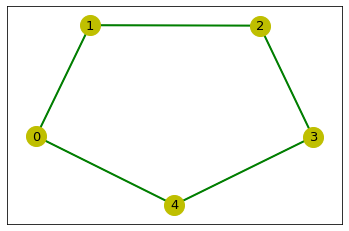

Total expectation of original graph is:  3.8904916428447764
Total expectation of original graph is:  1.4177005370778635
Total expectation of original graph is:  2.6188616678305685
Total expectation of original graph is:  -0.21964346849166447
Total expectation of original graph is:  2.3304668608696897
Total expectation of original graph is:  0.7323342829915702
Total expectation of original graph is:  2.963899349101467
Total expectation of original graph is:  1.0156375316011643
Total expectation of original graph is:  0.7081229839865397
Total expectation of original graph is:  -0.35466198309224595
Total expectation of original graph is:  2.466668494393687
Total expectation of original graph is:  1.2002910629048547
Total expectation of original graph is:  0.986679783635147
Total expectation of original graph is:  0.7251844584006392
Total expectation of original graph is:  1.1078550445301736
Total expectation of original graph is:  -0.6484105544309047
Total expectation of original graph is

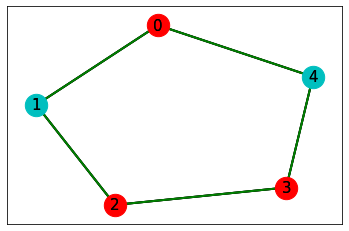

Solutions ((qubits str, number of sampling), energy):
 [(('01101', 233), -3), (('10010', 194), -3), (('11010', 187), -3), (('10101', 169), -3), (('01011', 158), -3), (('01001', 153), -3), (('10110', 148), -3), (('01010', 121), -3), (('10100', 98), -3), (('00101', 63), -3), (('11001', 276), 1), (('01000', 187), 1), (('10011', 174), 1), (('11100', 170), 1), (('11110', 166), 1), (('01110', 163), 1), (('11011', 162), 1), (('11000', 160), 1), (('01111', 159), 1), (('00111', 158), 1), (('10001', 157), 1), (('01100', 156), 1), (('10111', 156), 1), (('00011', 149), 1), (('10000', 144), 1), (('00010', 126), 1), (('11101', 124), 1), (('00100', 104), 1), (('00001', 103), 1), (('00110', 96), 1), (('11111', 206), 5), (('00000', 180), 5)]
Send results to client:
cluster 1: [1, 4]
cluster 2: [0, 2, 3]
cost: -3


In [1]:
from Qcover.core import Qcover
from Qcover.backends import CircuitByQulacs
from Qcover.optimizers import COBYLA
from Qcover.compiler import CompilerForQAOA
import networkx as nx
import matplotlib.pyplot as plt

# Qcover supports real quantum computers to solve combinatorial optimization problems.
# You only need to transform the combinatorial optimization problem into a weight graph,
# and you can use the quafu quantum computing cloud platform  (http://quafu.baqis.ac.cn/)
# to solve the corresponding problem. The following is an example of a max-cut problem.

# The weight graph corresponding to the combinatorial optimization problem and transformed it to networkx format.

def generate_circle(n):
    nodes = []
    edges = []
    for i in range(n-1):
        nodes.append((i, 0))
        edges.append((i, i + 1, 1))
    nodes.append((n - 1, 0))
    edges.append((n - 1, 0, 1))
    return nodes, edges

n = 5
nodes, edges = generate_circle(n)
graph = nx.Graph()
for nd in nodes:
    u, w = nd[0], nd[1]
    graph.add_node(int(u), weight=int(w))
for ed in edges:
    u, v, w = ed[0], ed[1], ed[2]
    graph.add_edge(int(u), int(v), weight=int(w))


# draw weighted graph to be calculated
new_labels = dict(map(lambda x: ((x[0], x[1]), str(x[2]['weight'])), graph.edges(data=True)))
pos = nx.spring_layout(graph)
# pos = nx.circular_layout(g)
nx.draw_networkx(graph, pos=pos, node_size=400, font_size=13, node_color='y')
# nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=new_labels, font_size=15)
nx.draw_networkx_edges(graph, pos, width=2, edge_color='g', arrows=False)
plt.show()

# Using Qcover to calculate the optimal parameters of QAOA circuit.
p = 4
bc = CircuitByQulacs()
optc = COBYLA(options={'maxiter':100, 'tol': 1e-19, 'disp': True})
qc = Qcover(graph, p=p, optimizer=optc, backend=bc)
res = qc.run()
optimal_params = res['Optimal parameter value']

# Compile and send the QAOA circuit to the quafu cloud.
# Token parameter should be set according to your own account
# For more introduction see https://github.com/ScQ-Cloud/pyquafu
token = "MDmpWCw5vOzE9iLSWMs-q4ooqmGq1rEQXn5ATOshIO2.9ZzMzEjN3gjN2EjOiAHelJCL5MjM6ICZpJye.9JiN1IzUIJiOicGbhJCLiQ1VKJiOiAXe0Jye"
cloud_backend = 'ScQ-P20'
qcover_compiler = CompilerForQAOA(graph, p=p, optimal_params=optimal_params, apitoken=token, cloud_backend=cloud_backend)
task_id = qcover_compiler.send(wait=True, shots=5000, task_name='MaxCut')
# If you choose wait=Ture, you have to wait for the result to return.
# If you choose wait=False, you can execute the following command to query the result status at any time,
# and the result will be returned when the task is completed.
quafu_solver = qcover_compiler.task_status_query(task_id)
if quafu_solver:
    counts_energy = qcover_compiler.results_processing(quafu_solver)
    qcover_compiler.visualization(counts_energy)